In [102]:
# import libaries in python
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline 
# to display plots in Jupyter notebook
import seaborn as sns # for data visualization
import xgboost as xgb # for machine learning

In [103]:
df = pd.read_csv("dataset/coin_Ethereum.csv") # read the dataset

In [104]:
df.head() # get the first 5 rows of the dataframe

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [105]:
df.info() # get the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Open       2160 non-null   float64
 7   Close      2160 non-null   float64
 8   Volume     2160 non-null   float64
 9   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 168.9+ KB


In [106]:
df.describe() # get the summary statistics of the dataframe

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,1080.500000,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,623.682612,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,540.750000,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,1080.500000,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,1620.250000,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2160.000000,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11


In [107]:
df.isnull().sum() # check for missing values

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [108]:
df.head(
)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [109]:
df.index = pd.to_datetime(df.Date) # convert the Date column to datetime

In [110]:
df.drop(['Date','Name','Symbol','Volume','Marketcap','SNo'], axis=1, inplace=True) # drop the unnecessary columns

In [111]:
df.head()

,High,Low,Open,Close
Date,,,,
2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325
2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897
2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448
2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860
2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440


In [112]:
def create_features(df):
    df['dayofweek'] = df.index.dayofweek # create a new feature for the day of the week
    df['month'] = df.index.month # create a new feature for the month
    df['year'] = df.index.year # create a new feature for the year
    
    return df

In [113]:
df = create_features(df) # call the function to create new features

In [114]:
df.head()

,High,Low,Open,Close,dayofweek,month,year
Date,,,,,,,
2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,5,8,2015
2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,6,8,2015
2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,0,8,2015
2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1,8,2015
2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2,8,2015


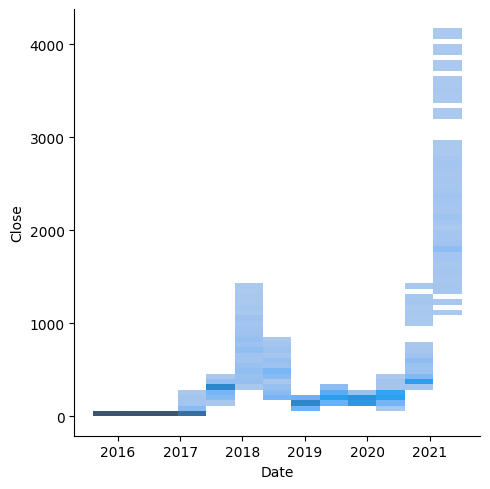

In [115]:
sns.displot(data= df, x=df.index,y='Close') # plot the closing price over time

<Axes: xlabel='Date'>

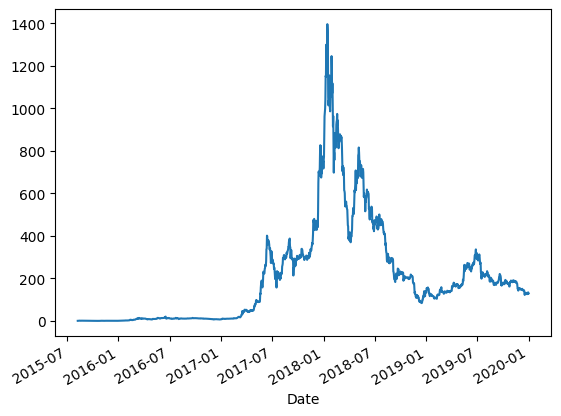

In [116]:
df['Close'].loc[(df.index < '01-01-2020')].plot() # plot the closing price before 2020

<Axes: xlabel='Date'>

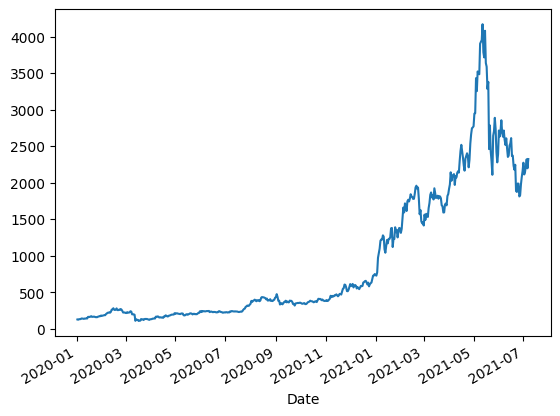

In [117]:
df['Close'].loc[(df.index > '01-01-2020')].plot() # plot the closing price after 2020

In [118]:
df.head()

,High,Low,Open,Close,dayofweek,month,year
Date,,,,,,,
2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,5,8,2015
2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,6,8,2015
2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,0,8,2015
2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1,8,2015
2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2,8,2015


In [119]:
new_df = pd.read_csv('C:/Users/udayk/Downloads/Career/python/Cryptocurrency price prediction/dataset/Ethereum Historical Data.csv')

In [120]:
new_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/14/2024,"3,210.65","3,187.02","3,238.39","3,167.02",850.53K,0.74%
1,11/13/2024,"3,187.02","3,244.57","3,326.89","3,117.79",988.07K,-1.71%
2,11/12/2024,"3,242.44","3,372.15","3,440.05","3,209.16",1.04M,-3.85%
3,11/11/2024,"3,372.13","3,185.97","3,384.62","3,107.45",1.06M,5.84%
4,11/10/2024,"3,186.05","3,126.25","3,247.49","3,076.40",925.65K,1.87%


In [121]:
new_df = new_df.iloc[::-1].reset_index(drop=True)

In [122]:
new_df.head(
    
)

,Date,Price,Open,High,Low,Vol.,Change %
0,01/14/2020,166.07,143.59,169.73,143.59,22.85M,15.65%
1,01/15/2020,166.45,166.07,166.45,159.74,16.66M,0.23%
2,01/16/2020,164.36,166.44,167.18,159.08,16.24M,-1.26%
3,01/17/2020,170.22,164.39,173.96,162.33,18.57M,3.57%
4,01/18/2020,174.19,170.18,179.29,165.34,17.42M,2.33%


In [123]:
new_df.index = pd.to_datetime(new_df['Date']) # convert the Date column to datetime

In [124]:
new_df.rename(columns={'Price':'Close'}, inplace=True) # rename the Price column to Close

In [125]:
new_df.drop(['Date','Vol.','Change %'], axis=1, inplace=True) # drop the unnecessary columns

In [126]:
new_df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1767 entries, 2020-01-14 to 2024-11-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1767 non-null   object
 1   Open    1767 non-null   object
 2   High    1767 non-null   object
 3   Low     1767 non-null   object
dtypes: object(4)
memory usage: 69.0+ KB


In [127]:
# Remove any commas or other symbols and convert columns to float
new_df['Close'] = new_df['Close'].str.replace(',', '').astype(float)
new_df['Open'] = new_df['Open'].str.replace(',', '').astype(float)
new_df['High'] = new_df['High'].str.replace(',', '').astype(float)
new_df['Low'] = new_df['Low'].str.replace(',', '').astype(float)

# Verify the changes
print(new_df.dtypes)
print(new_df.head())

Close    float64
Open     float64
High     float64
Low      float64
dtype: object
             Close    Open    High     Low
Date                                      
2020-01-14  166.07  143.59  169.73  143.59
2020-01-15  166.45  166.07  166.45  159.74
2020-01-16  164.36  166.44  167.18  159.08
2020-01-17  170.22  164.39  173.96  162.33
2020-01-18  174.19  170.18  179.29  165.34


In [128]:
new_df.info()
new_df.isnull().sum() # check for missing values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1767 entries, 2020-01-14 to 2024-11-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1767 non-null   float64
 1   Open    1767 non-null   float64
 2   High    1767 non-null   float64
 3   Low     1767 non-null   float64
dtypes: float64(4)
memory usage: 69.0 KB


Close    0
Open     0
High     0
Low      0
dtype: int64

In [129]:
features = ['High','Low','Open','dayofweek','month','year']
target = ['Close']

In [130]:
x_train = df[features]
y_train = df[target]


x_test = df[features]
y_test = new_df[target]

In [131]:
x_train

,High,Low,Open,dayofweek,month,year
Date,,,,,,
2015-08-08 23:59:59,2.798810,0.714725,2.793760,5,8,2015
2015-08-09 23:59:59,0.879810,0.629191,0.706136,6,8,2015
2015-08-10 23:59:59,0.729854,0.636546,0.713989,0,8,2015
2015-08-11 23:59:59,1.131410,0.663235,0.708087,1,8,2015
2015-08-12 23:59:59,1.289940,0.883608,1.058750,2,8,2015
...,...,...,...,...,...,...
2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,4,7,2021
2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,5,7,2021
2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,6,7,2021


In [132]:
xgbr = xgb.XGBRFRegressor() # create the model

In [133]:
xgbr.fit(x_train, y_train) # fit the model

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [134]:
xgbr.score(x_train, y_train) # check the accuracy of the model

0.9989649653434753

In [ ]:
xgbr.score(x_test, y_test) # check the accuracy of the model

In [137]:
print("x_train columns:", x_train.columns) # check the columns of the training data
print("x_test columns:", x_test.columns) # check the columns of the testing data


x_train columns: Index(['High', 'Low', 'Open', 'dayofweek', 'month', 'year'], dtype='object')
x_test columns: Index(['High', 'Low', 'Open', 'dayofweek', 'month', 'year'], dtype='object')


In [99]:
# Fit the model
xgbr.fit(x_train, y_train)

# Make predictions
predictions = xgbr.predict(x_test)


In [138]:
predictions # print the predictions

array([3182.8804 ,  418.05627, 3146.4229 , 2851.388  , 1775.5096 ,
       2615.1914 , 2381.9001 , 1792.2566 , 1200.4423 , 2053.216  ,
       3454.717  ,  626.1047 , 3375.0413 , 1316.2433 , 1780.5554 ,
        355.0772 , 2289.796  , 1991.7814 ,  357.2917 ,  124.00385,
       1722.9081 ,  397.0273 , 1967.2742 ,  390.8182 , 1588.8158 ,
       3449.1682 ,  126.39652,  595.39856, 1482.6439 , 3436.8003 ,
       1054.9022 , 1830.6691 , 1902.65   , 1889.763  ,  597.6222 ,
        219.91289, 2300.646  ,  255.5965 , 2403.773  , 1812.3918 ,
       1792.275  ,  389.75192, 1859.2565 , 2924.4492 , 1557.3519 ,
        219.91289, 2494.765  , 2284.58   , 1876.5823 , 1556.2838 ,
       3066.4854 , 2542.3582 , 1813.8966 , 3014.2188 , 1844.4261 ,
       1912.5828 , 2517.8306 , 1174.9384 , 1589.3893 , 2804.8098 ,
       1814.7837 ,  213.24298, 1841.4822 , 3119.4197 , 2351.0164 ,
       1900.3313 , 1286.561  , 2617.8667 , 4051.4636 , 2577.3118 ,
       1900.3313 , 3069.6582 , 2320.965  , 1592.8126 , 3454.71

In [ ]:
xgbr = xgb.XGBRFRegressor(
    colsample_bytree=0.7, # 70% of the features are randomly sampled for each tree
    learning_rate=0.1, # learning rate of the model
    max_depth=5, # maximum depth of the tree
    n_estimators=500, # number of trees in the forest
    objective='reg:squarederror' # regression problem
) # create the model

In [142]:
xgbr.fit(x_train, y_train) # fit the model

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=0.7, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=500, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

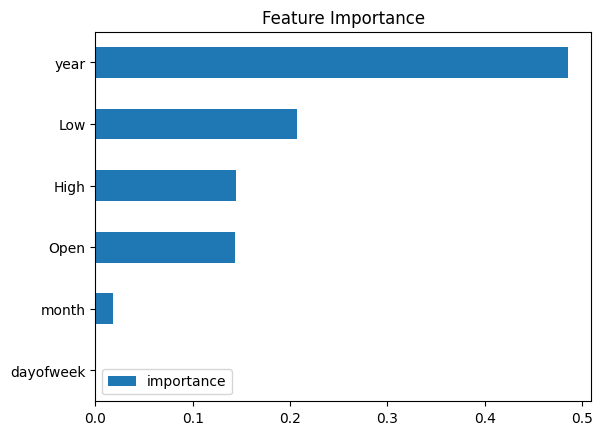

In [145]:
fi = pd.DataFrame(data=xgbr.feature_importances_, index=x_train.columns, columns=['importance']) # get the feature importance
fi = fi.sort_values('importance').plot(kind = 'barh', title='Feature Importance') # sort the feature importance in descending order
plt.show() # show the plot

In [147]:
extended_df = pd.concat([df, new_df], ignore_index=True)


In [153]:
new_df = new_df.reset_index()  # Reset the index if needed
predictions_df = pd.DataFrame({'predictions': xgbr.predict(x_test)})
extended_df = extended_df.merge(predictions_df, how='left', left_index=True, right_index=True)


In [ ]:
import matplotlib.pyplot as plt

# Filter and plot 'Close' values from 2021 onward
ax = extended_df['Close'].loc[extended_df.index > '2021-01-01'].plot(figsize=(15, 5))
# Plot 'predictions' on the same axis
extended_df['predictions'].plot(ax=ax, style='.')

# Add legend, title, and show plot
plt.legend(["Actual Values", "Predictions"])
ax.set_title('Actual Values vs. Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

TypeError: Invalid comparison between dtype=int64 and str

In [158]:
extended_df.index = pd.to_datetime(extended_df.index, errors='coerce')


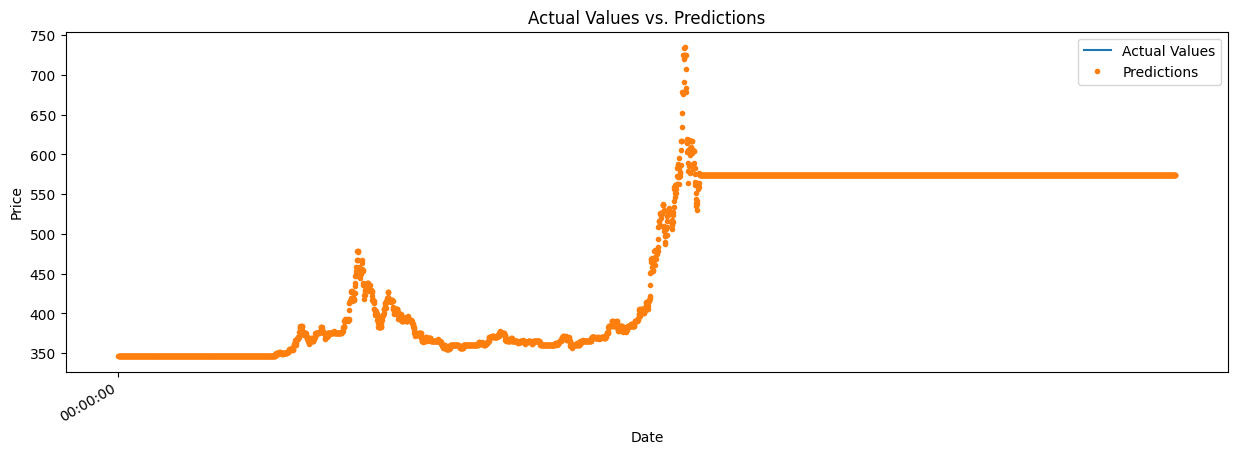

In [159]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure index is in datetime format
extended_df.index = pd.to_datetime(extended_df.index, errors='coerce')

# Filter and plot 'Close' values from 2021 onward
ax = extended_df['Close'].loc[extended_df.index > '2021-01-01'].plot(figsize=(15, 5))
# Plot 'predictions' on the same axis
extended_df['predictions'].plot(ax=ax, style='.')

# Add legend, title, and show plot
plt.legend(["Actual Values", "Predictions"])
ax.set_title('Actual Values vs. Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()
